In [120]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [144]:
df = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\HighwayData\\10MilesData.xlsx', 
                   sheet_name= '10milesdata')

In [145]:
df['IRI Rating'] = df['IRI Rating'].replace(to_replace=['qaqq'], value='GOOD')

In [147]:
df['HQ Owner'] = df['HQ Owner'].replace(['DISTRICT 1 (DEMING)', 'DISTRICT 2 (ROSWELL)', 'DISTRICT 3 (ALBUQUERQUE)', 
                                         'DISTRICT 4 (LAS VEGAS)', 'DISTRICT 5 (SANTA FE)', 'DISTRICT 6 (GRANTS/MILAN)'], 
                                        ['1 - DEMING', '2 - ROSWELL', '3 - ALBUQUERQUE', '4 - LAS VEGAS', '5 - SANTA FE', '6 - GRANTS/MILAN'])

In [154]:
df.tail()

,HQ Owner,Route,Direction,Begin Mile,End Mile,Length,Lane Miles,Pavement Type,HPMS Cracking Percent,Average IRI,Rutting Measure,Cracking Percent Rating,IRI Rating,Rutting Rating,Condition Rating
33647,4 - LAS VEGAS,US-84-P,Increasing (P),62.694,62.700,0.006,0.012,Rigid – PCC,0.0,60,0.00,GOOD,GOOD,GOOD,GOOD
33648,4 - LAS VEGAS,US-84-P,Increasing (P),41.600,41.700,0.100,0.200,Rigid – PCC,40.9,171,0.01,POOR,POOR,GOOD,POOR
33649,4 - LAS VEGAS,US-87-P,Increasing (P),8.200,8.300,0.100,0.200,Rigid – PCC,0.0,231,0.01,GOOD,POOR,GOOD,FAIR
33650,4 - LAS VEGAS,US-87-P,Increasing (P),8.300,8.341,0.041,0.082,Rigid – PCC,27.3,261,0.07,POOR,POOR,GOOD,POOR
33651,4 - LAS VEGAS,US-87-P,Increasing (P),8.117,8.200,0.083,0.166,Rigid – PCC,4.8,211,0.08,GOOD,POOR,GOOD,FAIR


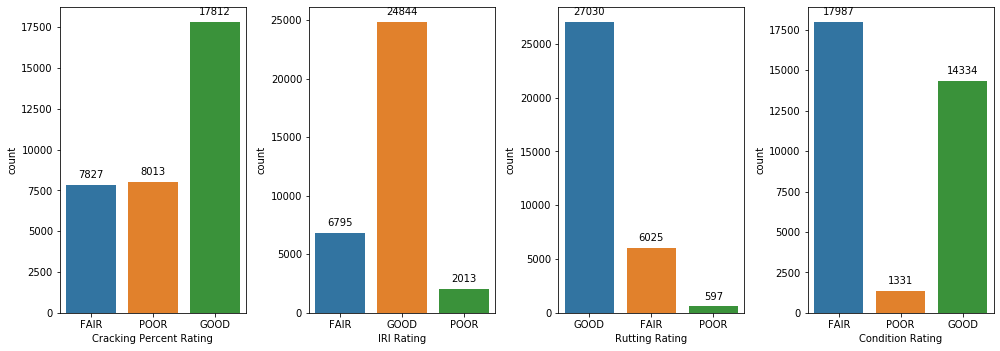

In [153]:
# Visualize the counts of various factors
fig, ax = plt.subplots(1, len(cols), figsize=(14,5))

cols = ['Cracking Percent Rating', 'IRI Rating', 'Rutting Rating', 'Condition Rating']

for i in range(len(ax)):
    splot = sns.countplot(df[cols[i]], ax=ax[i])
    for p in splot.patches:
            splot.annotate(format(p.get_height(), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()
